In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('data/SP500/symbols/GOOG.csv')
training_set = dataset_train.iloc[:,5:6].values
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-01,437.280914,440.966949,437.181549,440.634094,440.634094,3391400
1,2013-10-02,438.512909,441.806488,436.073761,441.125916,441.125916,3009900
2,2013-10-03,441.130859,444.161163,433.232239,435.214355,435.214355,4261500
3,2013-10-04,434.672882,435.919769,432.189026,433.356445,433.356445,2733600
4,2013-10-07,430.922272,434.171143,429.263062,430.072784,430.072784,2603900
5,2013-10-08,429.864136,430.192017,423.063385,424.076782,424.076782,3912500
6,2013-10-09,425.373352,428.537781,418.766327,425.164703,425.164703,5337000
7,2013-10-10,429.128937,431.607819,427.325653,431.314728,431.314728,4539800
8,2013-10-11,430.216858,433.917786,429.854218,433.177612,433.177612,2836100
9,2013-10-14,430.529816,435.293823,429.898926,435.224274,435.224274,2503300


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and t+1 output
X_train = []
y_train = []
for i in range(60, 1239):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True, input_shape = (None, 1)))

# Adding a second LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a third LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a fourth LSTM layer
regressor.add(LSTM(units = 3))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Using TensorFlow backend.


Epoch 1/100
1179/1179 [==============================] - 6s - loss: 0.0726     
Epoch 2/100
1179/1179 [==============================] - 5s - loss: 0.0185     
Epoch 3/100
1179/1179 [==============================] - 5s - loss: 0.0051     
Epoch 4/100
1179/1179 [==============================] - 5s - loss: 0.0030     
Epoch 5/100
1179/1179 [==============================] - 5s - loss: 0.0027     
Epoch 6/100
1179/1179 [==============================] - 5s - loss: 0.0025     
Epoch 7/100
1179/1179 [==============================] - 5s - loss: 0.0026     
Epoch 8/100
1179/1179 [==============================] - 5s - loss: 0.0025     
Epoch 9/100
1179/1179 [==============================] - 5s - loss: 0.0025     
Epoch 10/100
1179/1179 [==============================] - 6s - loss: 0.0023     
Epoch 11/100
1179/1179 [==============================] - 5s - loss: 0.0023     
Epoch 12/100
1179/1179 [==============================] - 5s - loss: 0.0022     
Epoch 13/100
1179/1179 [=============

In [6]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price 
dataset_test = pd.read_csv('data/SP500/symbols/GOOG_test.csv')
test_set = dataset_test.iloc[:,5:6].values
real_stock_price = np.concatenate((training_set[0:1239], test_set), axis = 0)


In [10]:
test_set

array([[1197.      ],
       [1186.47998 ],
       [1171.439941],
       [1164.829956],
       [1164.640015],
       [1177.359985],
       [1162.819946],
       [1175.329956],
       [1172.530029],
       [1156.050049],
       [1161.219971],
       [1171.089966],
       [1186.869995],
       [1166.089966],
       [1173.369995],
       [1184.650024],
       [1180.48999 ],
       [1194.640015],
       [1193.469971]])

In [7]:

# Getting the predicted stock price of 2018
scaled_real_stock_price = sc.fit_transform(real_stock_price)
inputs = []
for i in range(1239, 1258):
    inputs.append(scaled_real_stock_price[i-60:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

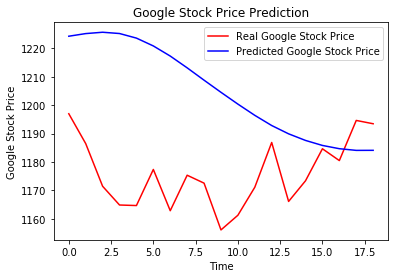

In [8]:
# Visualising the results
plt.plot(real_stock_price[1239:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [11]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [13]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(test_set, predicted_stock_price)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(test_set, predicted_stock_price))))

Score
MAE:  31.2821
RMSE: 36.6369  


In [14]:
print('MSE:  %.4f' % (mean_squared_error(test_set, predicted_stock_price)))

MSE:  1342.2630
